# Correctly classify German Traffic Signs

**Dataset contains 43 different types of Traffic Signs**

## Importing Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# To show image within the notebook
%matplotlib inline

## Loading Train Dataset

In [2]:
PATH_BASE = "Data/"
PATH_TRAIN = os.path.join(PATH_BASE, "Train/")
PATH_TEST = os.path.join(PATH_BASE, "Test/")

In [3]:
train_df = pd.read_csv("Data/Train.csv")
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
train_df.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

- First 6 columns -> `'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'` , represents that `each picture` is of `varying dimensions`.
- `'ClassID'` shows which of the `43 classes` the image belongs to.
- `'Path'` represents the `path of the picture`.

In [5]:
len(train_df)

39209

- There are `39209` images in Train data.

## Data Visualization

### Random Images Visualization

In [6]:
files = glob.glob("Data/Train/*/*")

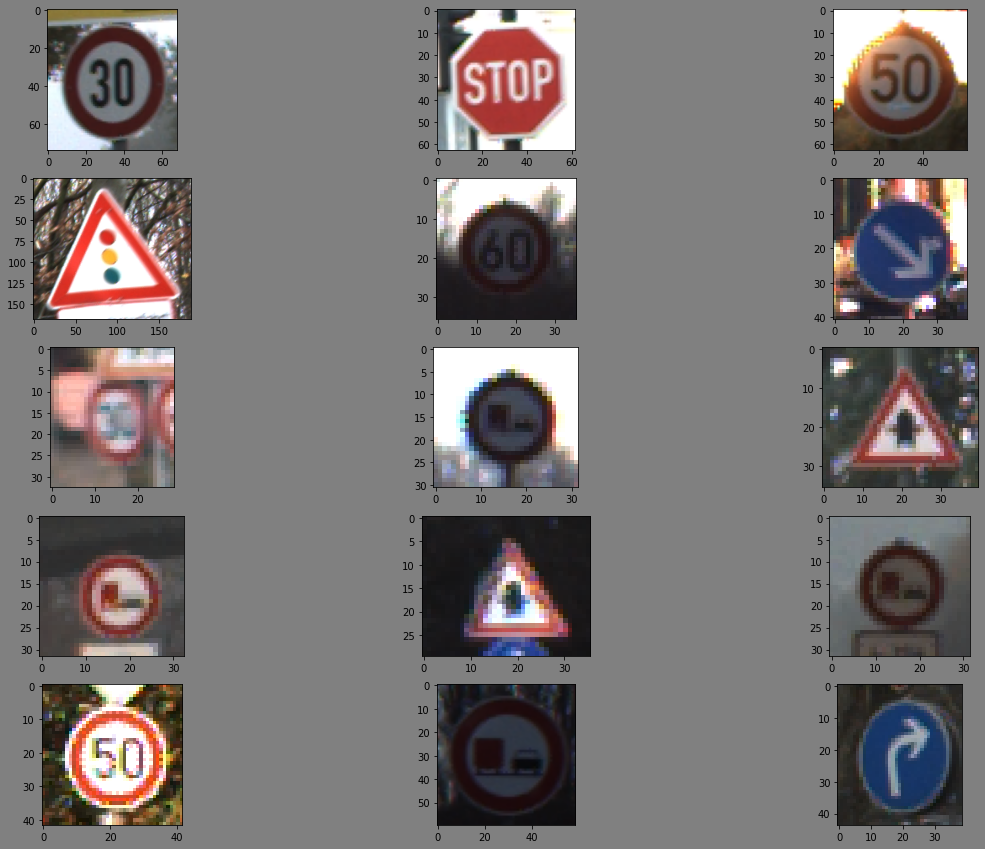

In [7]:
figure, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 15))
for i in range(15):
    path = np.random.choice(files)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i//3, i%3].imshow(image)
figure.set_facecolor("grey")
plt.show()

### Checking count of each class

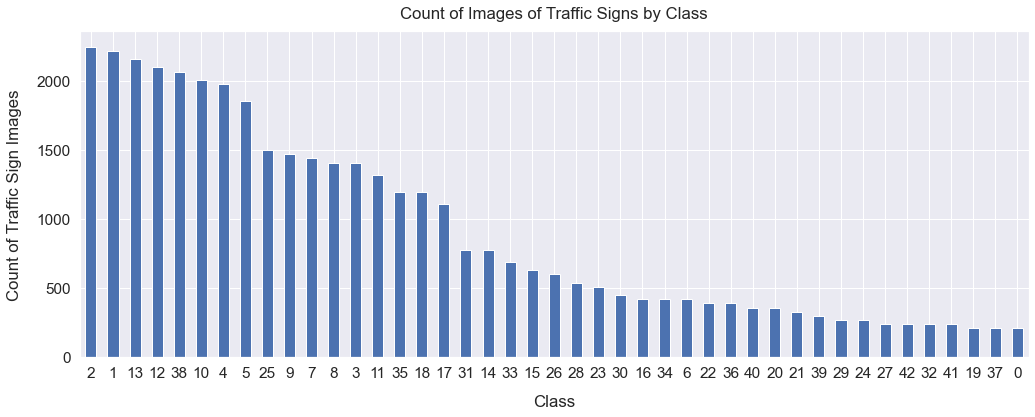

In [8]:
sns.set(font_scale = 1.4)
train_df['ClassId'].value_counts().plot(kind = 'bar', figsize = (17, 6), rot = 0)
plt.xlabel("Class", labelpad = 14)
plt.ylabel("Count of Traffic Sign Images", labelpad = 14)
plt.title("Count of Images of Traffic Signs by Class", y = 1.02)
plt.show()

`Class 2` has the highest number of images while `Classes 19, 37, and 0` has the lowest number of images.

### Visualization of Images based on Class

In [19]:
def visualize_train_batch(paths, categories):
    plt.figure(figsize = (16, 16))
    for ind, info in enumerate(zip(paths, categories)):
        path, category = info
        plt.subplot(2, 3, ind + 1)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(f"Category: {category}", fontsize = 20, color = 'k')
        plt.axis("off")
    plt.show()

In [20]:
def visualize_by_id(df, _id = None):
    if _id is not None:
        cat = df[df["ClassId"] == _id].sample(3)
    visualize_train_batch('Data/' + cat["Path"], cat["ClassId"])

#### Images for Class 10

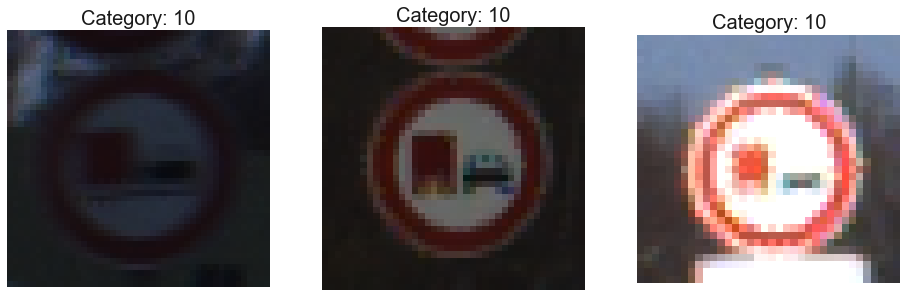

In [21]:
visualize_by_id(train_df, 10)

#### Images for Class 2

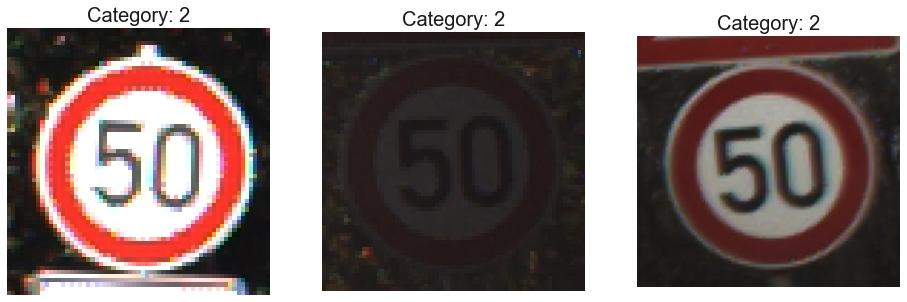

In [22]:
visualize_by_id(train_df, 2)

#### Images for Class 35

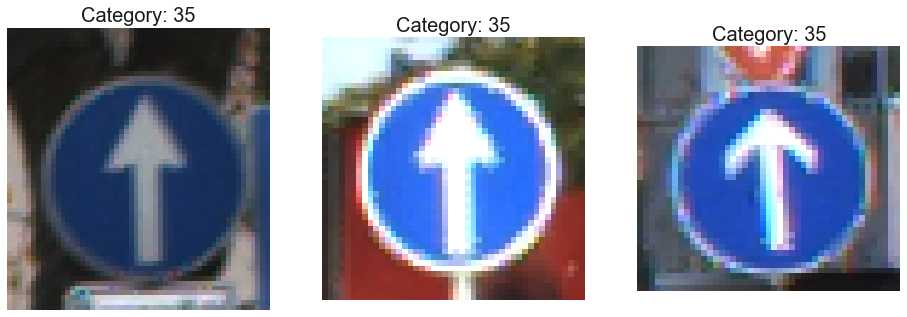

In [23]:
visualize_by_id(train_df, 35)

 #### Images for Class 35

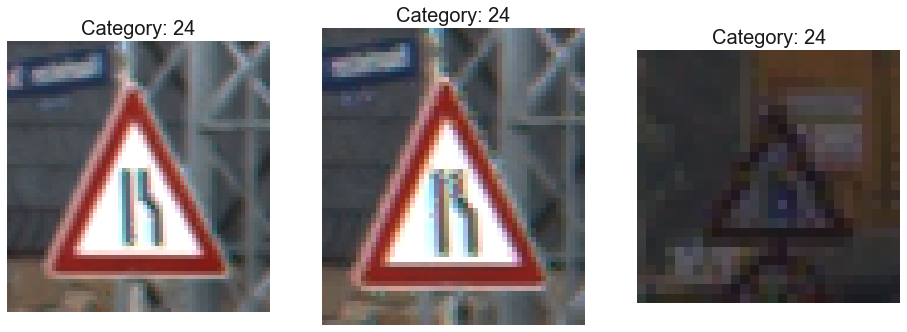

In [24]:
visualize_by_id(train_df, 24)